# Importing Dependencies

In [1]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load and preprocess the dataset

In [2]:
def load_dataset():
    dataset_path = r"C:\Users\HP\Desktop\project for old CV methods\Data"
    labels = os.listdir(dataset_path)
    sift = cv2.SIFT_create(40)
    all_descriptors = []
    all_labels = []


    for label in labels:
        label_path = os.path.join(dataset_path, label)
        descriptors_per_label = []
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            _, descriptors = sift.detectAndCompute(img, None)
            descriptors = np.sum(descriptors, axis=0)  # columns wise adding
            descriptors = descriptors/(np.linalg.norm(descriptors) + 1e-6)
            all_descriptors.append(descriptors)
            all_labels.append(label)
                              
    return np.array(all_descriptors), all_labels


X, y = load_dataset()

# One Hot Encoding

In [3]:
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Reshape the data to a 2D array (required by the encoder)
string_list_2d = [[i] for i in y]

# Fit and transform the data to one-hot encoded format
one_hot_labels = encoder.fit_transform(string_list_2d)


train_data1, test_data1, train_labels1, test_labels1 = train_test_split(X, one_hot_labels,
                                                                        random_state=42, test_size=0.20,shuffle=True)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Model Creation

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=(128,), activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='softmax'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))
# opt = RMSprop(lr=0.001)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
        
# Initialize empty lists to store training history
train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

max_accuracy = 0.5
for i in range(100):
    print("Epoch no", i + 1)
    history = model.fit(train_data1, train_labels1, epochs=1, batch_size=16, verbose=1, validation_data=(test_data1, test_labels1))
    
    # Extract and append history values to lists
    train_loss_history.append(history.history['loss'][0])
    train_accuracy_history.append(history.history['accuracy'][0])
    val_loss_history.append(history.history['val_loss'][0])
    val_accuracy_history.append(history.history['val_accuracy'][0])

    if history.history['val_accuracy'][0] > max_accuracy:
        print("New best model found above")
        max_accuracy = history.history['val_accuracy'][0]
        model.save('modelupdation.h5')

        

model=tf.keras.models.load_model('modelupdation.h5')
[train_loss, train_accuracy] = model.evaluate(train_data1, train_labels1)
print("Evaluation result on Train Data : Loss = {}, accuracy = {}".format(train_loss, train_accuracy))
[test_loss, test_acc] = model.evaluate(test_data1, test_labels1)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


Epoch no 1
177/177 [==============================] - 3s 7ms/step - loss: 1.3742 - accuracy: 0.2890 - val_loss: 1.3603 - val_accuracy: 0.3098
Epoch no 2
177/177 [==============================] - 1s 7ms/step - loss: 1.3347 - accuracy: 0.3488 - val_loss: 1.3265 - val_accuracy: 0.3706
Epoch no 3
177/177 [==============================] - 1s 7ms/step - loss: 1.3216 - accuracy: 0.3544 - val_loss: 1.3238 - val_accuracy: 0.4144
Epoch no 4
177/177 [==============================] - 1s 6ms/step - loss: 1.3038 - accuracy: 0.3817 - val_loss: 1.2938 - val_accuracy: 0.4116
Epoch no 5
177/177 [==============================] - 1s 7ms/step - loss: 1.2823 - accuracy: 0.4029 - val_loss: 1.2879 - val_accuracy: 0.4187
Epoch no 6
177/177 [==============================] - 1s 6ms/step - loss: 1.2606 - accuracy: 0.4227 - val_loss: 1.3574 - val_accuracy: 0.3536
Epoch no 7
177/177 [==============================] - 1s 7ms/step - loss: 1.2413 - accuracy: 0.4372 - val_loss: 1.2507 - val_accuracy: 0.4286
Epoch 

177/177 [==============================] - 1s 7ms/step - loss: 0.8525 - accuracy: 0.6700 - val_loss: 0.9639 - val_accuracy: 0.6040
New best model found above
Epoch no 57
177/177 [==============================] - 1s 7ms/step - loss: 0.8471 - accuracy: 0.6714 - val_loss: 1.0192 - val_accuracy: 0.5644
Epoch no 58
177/177 [==============================] - 1s 7ms/step - loss: 0.8386 - accuracy: 0.6767 - val_loss: 0.9725 - val_accuracy: 0.6124
New best model found above
Epoch no 59
177/177 [==============================] - 1s 7ms/step - loss: 0.8410 - accuracy: 0.6770 - val_loss: 0.9510 - val_accuracy: 0.6139
New best model found above
Epoch no 60
177/177 [==============================] - 1s 6ms/step - loss: 0.8285 - accuracy: 0.6781 - val_loss: 1.0294 - val_accuracy: 0.5728
Epoch no 61
177/177 [==============================] - 1s 7ms/step - loss: 0.8280 - accuracy: 0.6841 - val_loss: 0.9515 - val_accuracy: 0.6139
Epoch no 62
177/177 [==============================] - 1s 7ms/step - loss

# Visualization 

23/23 [==============================] - 0s 2ms/step


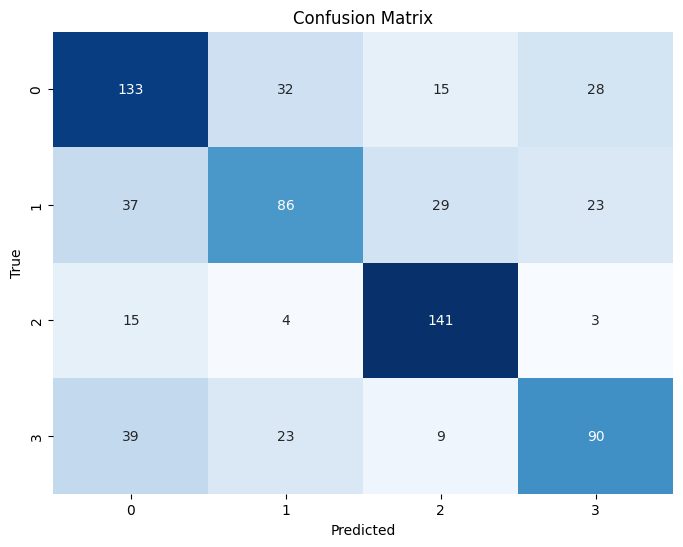

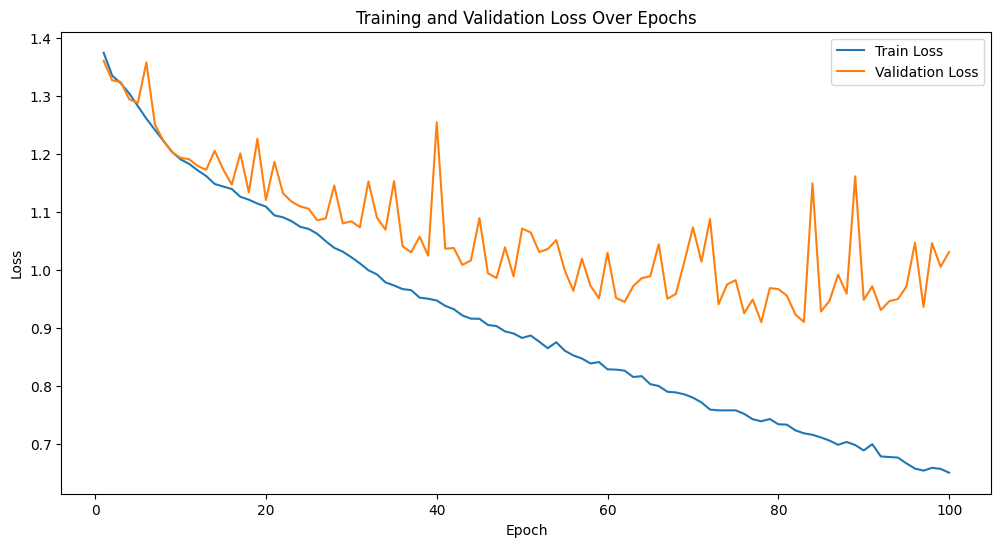

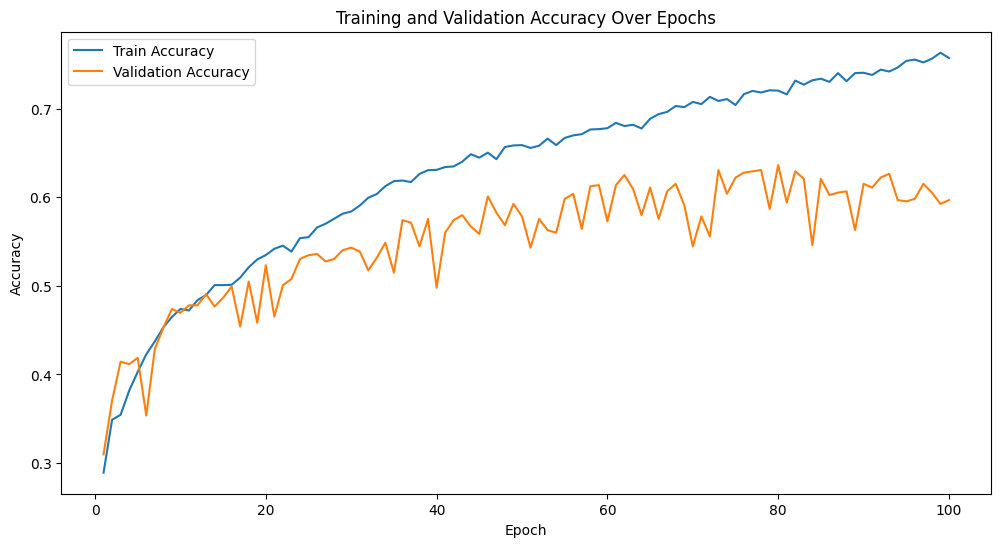

In [5]:
# Confusion Metrics
predictions_one_hot = model.predict(test_data1)
cm = confusion_matrix(test_labels1.argmax(axis=1), predictions_one_hot.argmax(axis=1))

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Create a DataFrame from the training history
history_df = pd.DataFrame({'Epoch': range(1, len(train_loss_history) + 1),
                           'Train_Loss': train_loss_history,
                           'Train_Accuracy': train_accuracy_history,
                           'Validation_Loss': val_loss_history,
                           'Validation_Accuracy': val_accuracy_history})

# Plot the training and validation loss using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=history_df, x='Epoch', y='Train_Loss', label='Train Loss')
sns.lineplot(data=history_df, x='Epoch', y='Validation_Loss', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Plot the training and validation accuracy using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=history_df, x='Epoch', y='Train_Accuracy', label='Train Accuracy')
sns.lineplot(data=history_df, x='Epoch', y='Validation_Accuracy', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()
